# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/ml-mipt/ml-mipt/basic_s20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,803,93,47,84,205,71,7,176,36,21,152,190,476,201,70,7,19,198,201
1,680,95,46,76,162,66,11,162,42,20,155,175,381,172,74,8,4,184,193
2,457,83,45,73,161,68,8,142,46,18,144,169,305,179,71,10,3,191,199
3,506,101,51,112,201,59,11,214,32,24,162,223,667,194,65,0,36,190,206
4,532,104,49,105,209,61,11,207,32,24,157,217,637,168,64,0,19,193,207
5,319,102,51,92,194,60,6,220,30,25,162,247,731,209,80,7,7,188,186
6,658,91,39,77,153,59,8,139,48,18,139,159,289,123,62,8,17,201,209
7,467,96,54,104,175,58,10,215,31,24,175,221,682,222,75,13,23,186,194
8,768,91,46,101,199,65,9,196,34,23,146,219,574,199,73,5,8,186,194
9,838,95,43,76,142,57,10,151,44,19,149,173,339,159,71,2,23,187,200


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.757741,93.535519,44.735883,81.994536,168.544627,61.668488,8.679417,168.570128,40.998179,20.566485,147.823315,188.486339,438.329690,174.120219,72.375228,6.189435,13.067395,188.994536,195.814208
std,240.775491,8.091240,6.201999,15.821598,33.140217,8.045907,4.953355,33.210305,7.759736,2.599419,14.578372,31.219004,176.891392,32.809116,7.617295,4.930225,9.173759,6.179343,7.448001
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,61.000000,0.000000,0.000000,176.000000,181.000000
25%,209.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,168.000000,320.000000,149.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,407.000000,92.000000,44.000000,80.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,619.000000,99.000000,49.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,586.000000,197.000000,75.000000,9.000000,20.000000,193.000000,201.000000
max,842.000000,119.000000,59.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,186.000000,288.000000,1018.000000,264.000000,127.000000,22.000000,38.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

We will preprocess the data by subtracting the mean value and dividing by standard deviation using the StandardScaler module.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt

In [8]:
model_pipeline = Pipeline(steps=(('preproc', StandardScaler()), 
                                 ('estimator', LogisticRegression(multi_class='multinomial', 
                                                                  solver='saga', tol=1e-3, max_iter=500))))
param_distr = {
    'estimator__C': np.logspace(-3, 3, 20)
}

clf_log_reg = RandomizedSearchCV(model_pipeline, param_distr, scoring='accuracy', cv=3)
clf_log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=(('preproc',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('estimator',
                                              LogisticRegression(C=1.0,
                                                                 class_weight=None,
                                                                 dual=False,
                                                                 fit_intercept=True,
                                                                 intercept_scaling=1,
                                                                 l1_ratio=None,
                                                                

In [9]:
print('Accurracy score: {}'.format(accuracy_score(clf_log_reg.predict(X_test), y_test)))
print('F1 score: {}'.format(f1_score(clf_log_reg.predict(X_test), y_test, average='weighted')))

Accurracy score: 0.8215488215488216
F1 score: 0.8220983786051084


In [10]:
print('Best score: {}'.format(clf_log_reg.best_score_))
print('Best params: {}'.format(clf_log_reg.best_params_))

Best score: 0.785063752276867
Best params: {'estimator__C': 1000.0}


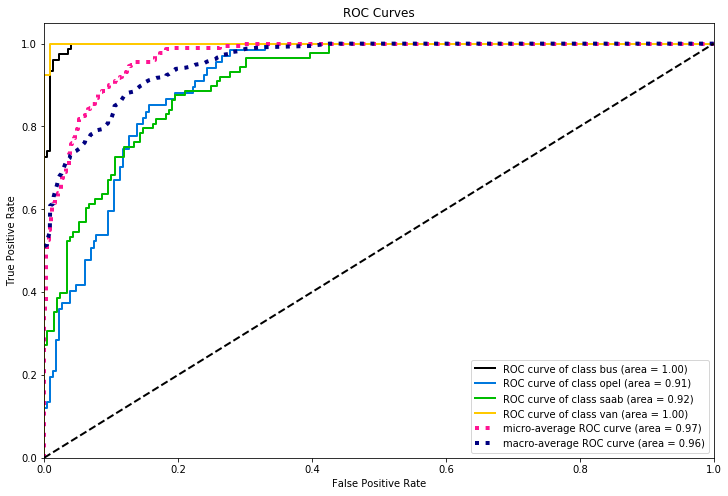

In [11]:
plot_roc(y_test, clf_log_reg.predict_proba(X_test), figsize=(12, 8))
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explained variance plot. 

In [12]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

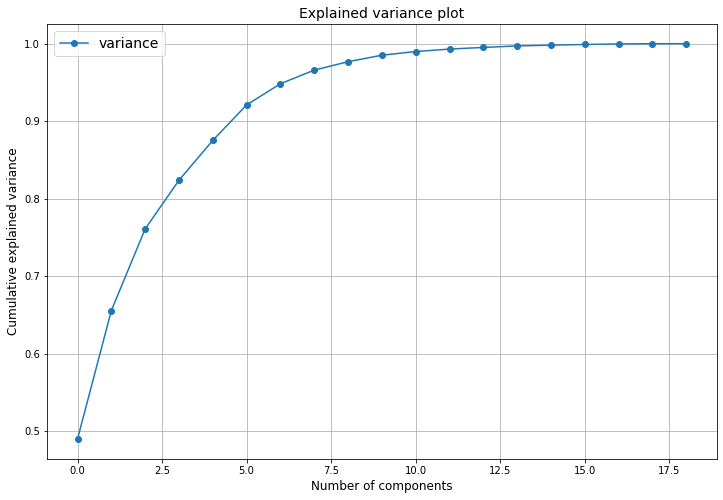

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o', label = 'variance')
plt.title('Explained variance plot', fontsize=14)
plt.xlabel('Number of components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)
plt.legend(loc = 'best', prop = {'size': 14})
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Due to the explained variance plot the appropriate number of components should be about 7. I will choose this number. The data for the PCA should be normalized and I will use such data. 

In [14]:
pca = PCA(n_components=7)

pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)

pca.fit(X_test_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('Original shape: {}'.format(X_train_scaled.shape))
print('Shape after transformation: {}'.format(X_train_pca.shape))

Original shape: (549, 19)
Shape after transformation: (549, 7)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

It seems like we should make a full pipeline, which consists of scaling the data, applying PCA and applying LogisticRegression in order not to allow data leakage.

In [15]:
model_pipeline_pca = Pipeline(steps=(('scaling', StandardScaler()),
                                     ('pca', PCA(n_components=7)),
                                     ('estimator', LogisticRegression(multi_class='multinomial', 
                                                                  solver='saga', tol=1e-3, max_iter=500))))

param_distr = {
    'estimator__C': np.logspace(-3, 3, 20)
}

clf_pca = RandomizedSearchCV(model_pipeline_pca, param_distr, scoring='accuracy', cv=3)
clf_pca.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=(('scaling',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('pca',
                                              PCA(copy=True,
                                                  iterated_power='auto',
                                                  n_components=7,
                                                  random_state=None,
                                                  svd_solver='auto', tol=0.0,
                                                  whiten=False)),
                                             ('estimator',
                                              LogisticRegression(C=1.0,
          

In [16]:
print('Accurracy score: {}'.format(accuracy_score(clf_pca.predict(X_test), y_test)))
print('F1 score: {}'.format(f1_score(clf_pca.predict(X_test), y_test, average='weighted')))

Accurracy score: 0.5454545454545454
F1 score: 0.557811553271153


In [17]:
print('Best score: {}'.format(clf_pca.best_score_))
print('Best params: {}'.format(clf_pca.best_params_))

Best score: 0.6083788706739527
Best params: {'estimator__C': 26.366508987303554}


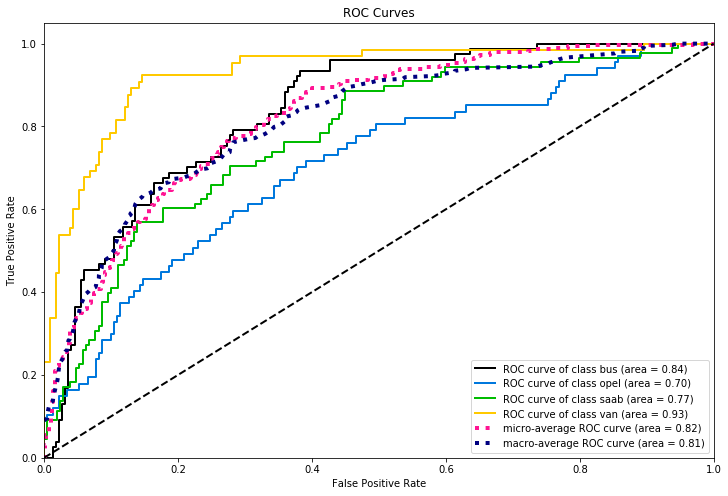

In [18]:
plot_roc(y_test, clf_pca.predict_proba(X_test), figsize=(12, 8))
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [19]:
from sklearn.tree import DecisionTreeClassifier

pipeline_tree = Pipeline(steps=(('scaling', StandardScaler()),
                                ('estimator', DecisionTreeClassifier())))

params = {
    'estimator__max_depth': np.arange(1, 100, 2)
}

clf_tree = RandomizedSearchCV(pipeline_tree, params, scoring='accuracy', cv=3)
clf_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=Pipeline(memory=None,
                                      steps=(('scaling',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('estimator',
                                              DecisionTreeClassifier(class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features=None,
                                                                     max_leaf_nodes=None,
                                                                     min_impurity_decrease=0.0,
              

In [20]:
print('Accurracy score: {}'.format(accuracy_score(clf_tree.predict(X_test), y_test)))
print('F1 score: {}'.format(f1_score(clf_tree.predict(X_test), y_test, average='weighted')))

Accurracy score: 0.7272727272727273
F1 score: 0.7288623196035425


In [21]:
print('Best score: {}'.format(clf_tree.best_score_))
print('Best params: {}'.format(clf_tree.best_params_))

Best score: 0.6666666666666666
Best params: {'estimator__max_depth': 19}


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*

*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions*.

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample
from scipy.stats import stats

Let's generate $N_{max}$ subsets of `train` data using bootsrap procedure once (`resample` function will help us).

In [23]:
N_min = 2
N_max = 100
step = 5

train_data = np.hstack((X_train, y_train[..., np.newaxis]))

subsets = np.array(resample(train_data))
subsets = subsets[np.newaxis, ...]
for i in range(N_max):
    subsets = np.concatenate((subsets, [resample(train_data)]))

Let's train our models with optimal hyperparameters and get predictions for logistic regression and decision tree on all the generated subsets.

In [24]:
log_reg_predictions = []
tree_predictions = []


for subset in subsets:
    
    log_reg_pipeline = Pipeline(steps=(('preproc', StandardScaler()), 
                                 ('estimator', LogisticRegression(C=clf_log_reg.best_params_['estimator__C'],
                                                                  multi_class='multinomial', 
                                                                  solver='saga', tol=1e-3, max_iter=500))))
    tree_pipeline = Pipeline(steps=(('scaling', StandardScaler()),
                                ('estimator', 
                                 DecisionTreeClassifier(max_depth=clf_tree.best_params_['estimator__max_depth']))))
    log_reg_pipeline.fit(subset[:, :-1], subset[:, -1])
    tree_pipeline.fit(subset[:, :-1], subset[:, -1])
    log_reg_predictions.append(log_reg_pipeline.predict(X_test))
    tree_predictions.append(tree_pipeline.predict(X_test))

log_reg_predictions = np.asarray(log_reg_predictions)
tree_predictions = np.asarray(tree_predictions)

In [25]:
# function to get average predictions, which allows to get an ensemble

def get_average_predictions(predictions):    
    average_predictions = []

    for number in range(N_min, N_max, step):
        averages = stats.mode(predictions[:number], axis=0).mode
        averages = [item for sublist in averages for item in sublist]
        average_predictions.append(averages)

    average_predictions = np.asarray(average_predictions)
    return average_predictions

In [26]:
log_reg_average_predictions = get_average_predictions(log_reg_predictions)
tree_average_predictions = get_average_predictions(tree_predictions)

Let's get the scores for obtained ensembles.

In [27]:
def get_scores(average_predictions):
    num_ensembles = average_predictions.shape[0]
    accuracy_scores = np.zeros(num_ensembles)
    f1_scores = np.zeros(num_ensembles)

    for i in range(num_ensembles):
        accuracy_scores[i] = accuracy_score(average_predictions[i], y_test)
        f1_scores[i] = f1_score(average_predictions[i], y_test, average='weighted')
        
    return accuracy_scores, f1_scores

In [28]:
log_reg_accuracy, log_reg_f1 = get_scores(log_reg_average_predictions)
tree_accuracy, tree_f1 = get_scores(tree_average_predictions)

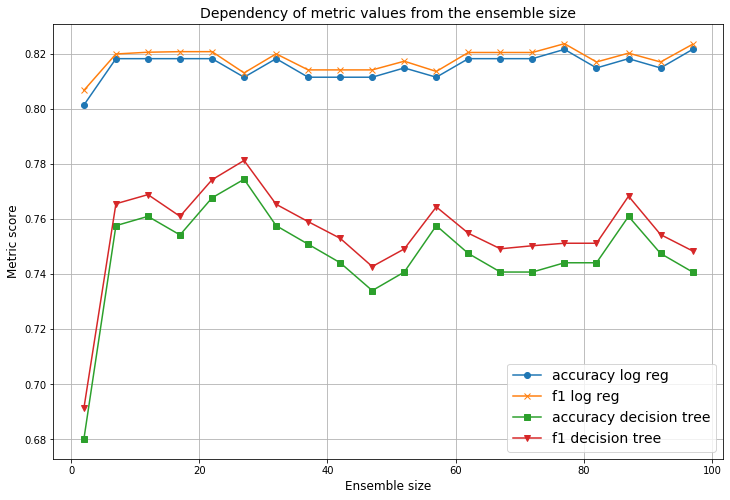

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(range(N_min, N_max, step), log_reg_accuracy, marker = 'o', label='accuracy log reg')
plt.plot(range(N_min, N_max, step), log_reg_f1, marker = 'x', label='f1 log reg')
plt.plot(range(N_min, N_max, step), tree_accuracy, marker = 's', label='accuracy decision tree')
plt.plot(range(N_min, N_max, step), tree_f1, marker = 'v', label='f1 decision tree')
plt.title('Dependency of metric values from the ensemble size', fontsize=14)
plt.xlabel('Ensemble size', fontsize=12)
plt.ylabel('Metric score', fontsize=12)
plt.legend(loc = 'best', prop = {'size': 14})
plt.grid()
plt.show()

### Answers

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer. It looks like the metric scores increase sharply while the number of algorithms is quite small ($\leq 15-20$), then it turns out that the quality doesn't change dramatically. So, I think that $15-20$ algorithms is the optimal number for this task.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? I suppose that found hyperparameters are optimal for trees in ensemble.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [30]:
from sklearn.ensemble import RandomForestClassifier
rand_forest_accuracy = []
rand_forest_f1 = []

for number in range(N_min, N_max, step):
    random_forest_clf = Pipeline(steps=(('scaling', StandardScaler()),
                                ('estimator', RandomForestClassifier(n_estimators=number))))
    random_forest_clf.fit(X_train, y_train)
    rand_forest_accuracy.append(accuracy_score(random_forest_clf.predict(X_test), y_test))
    rand_forest_f1.append(f1_score(random_forest_clf.predict(X_test), y_test, average='weighted'))

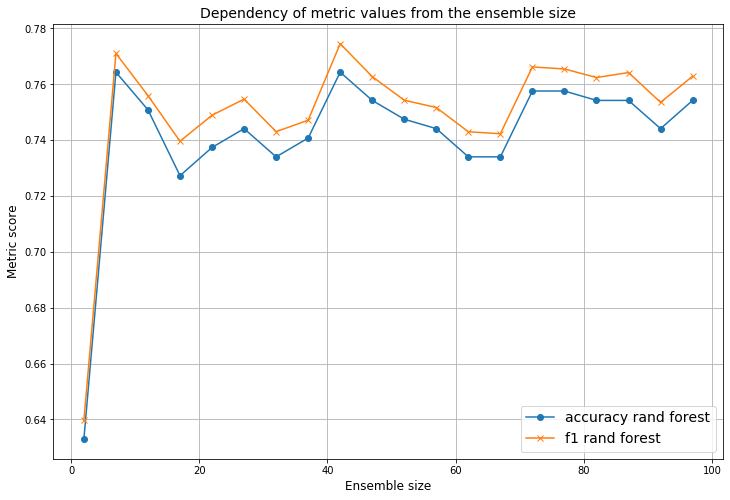

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(range(N_min, N_max, step), rand_forest_accuracy, marker = 'o', label='accuracy rand forest')
plt.plot(range(N_min, N_max, step), rand_forest_f1, marker = 'x', label='f1 rand forest')
plt.title('Dependency of metric values from the ensemble size', fontsize=14)
plt.xlabel('Ensemble size', fontsize=12)
plt.ylabel('Metric score', fontsize=12)
plt.legend(loc = 'best', prop = {'size': 14})
plt.grid()
plt.show()

### Answers

What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly. We see, that the metrics grow rapidly in the area of low-value ensemble sizes, than they seem to be almost constant. The optimal number of trees is also about $10-20$ trees, which doesn't differ from the optimal numbers for logistic regressions or decision trees in 2.6.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [44]:
# splitting the data into almost equal parts
n_parts = 10
n_elems = [X_train.shape[0] // n_parts + (i < (X_train.shape[0] % n_parts)) for i in range(n_parts)]
indices = np.cumsum(n_elems)

In [45]:
def train_and_test(pipeline, slice_index, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train[:index], y_train[:index])
    accuracy = accuracy_score(pipeline.predict(X_test), y_test)
    f1 = f1_score(pipeline.predict(X_test), y_test, average='weighted')
    return (accuracy, f1)

In [46]:
log_reg_pipeline = Pipeline(steps=(('preproc', StandardScaler()), 
                                 ('estimator', LogisticRegression(C=clf_log_reg.best_params_['estimator__C'],
                                                                  multi_class='multinomial', 
                                                                  solver='saga', tol=1e-3, max_iter=500))))
tree_pipeline = Pipeline(steps=(('scaling', StandardScaler()),
                                ('estimator', 
                                 DecisionTreeClassifier(max_depth=clf_tree.best_params_['estimator__max_depth']))))

random_forest_pipeline = Pipeline(steps=(('scaling', StandardScaler()),
                                ('estimator', 
                                 RandomForestClassifier(n_estimators=60))))
accuracy_log_reg = []
accuracy_tree = []
accuracy_rand_forest = []
f1_log_reg = []
f1_tree = []
f1_rand_forest = []

for index in indices:
    accuracy_log_reg.append(train_and_test(log_reg_pipeline, index, X_train, y_train, X_test, y_test)[0])
    accuracy_tree.append(train_and_test(tree_pipeline, index, X_train, y_train, X_test, y_test)[0])
    accuracy_rand_forest.append(train_and_test(random_forest_pipeline, index, X_train, y_train, X_test, y_test)[0])
    f1_log_reg.append(train_and_test(log_reg_pipeline, index, X_train, y_train, X_test, y_test)[1])
    f1_tree.append(train_and_test(tree_pipeline, index, X_train, y_train, X_test, y_test)[1])
    f1_rand_forest.append(train_and_test(random_forest_pipeline, index, X_train, y_train, X_test, y_test)[1])

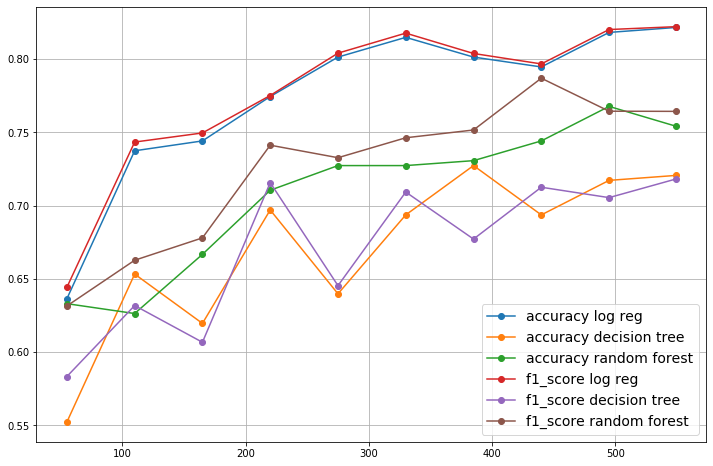

In [47]:
plt.figure(figsize=(12, 8))
plt.plot(indices, accuracy_log_reg, marker='o', label='accuracy log reg')
plt.plot(indices, accuracy_tree, marker='o', label='accuracy decision tree')
plt.plot(indices, accuracy_rand_forest, marker='o', label='accuracy random forest')
plt.plot(indices, f1_log_reg, marker='o', label='f1_score log reg')
plt.plot(indices, f1_tree, marker='o', label='f1_score decision tree')
plt.plot(indices, f1_rand_forest, marker='o', label='f1_score random forest')
plt.legend(loc = 'best', prop = {'size': 14})
plt.grid()
plt.show()

### Conclusion

It looks like logistic regression showed better results than the random forest and random forest in its turn was better than decision tree. The latter is not surprising because random forest is one of the best ways to combine trees in compositions in order to get better results.